# Определение неэффективных операторов

Заказчик - телеком оператор связи предоставляющий услучи связи, технические средства, программное обеспечение для организации call центров.

Call центры разделены по способам взаимодействия с клиентами:

- принимают входящие вызовы, маршрутизируя звонки между операторами;
- обеспечивают исходящие вызовы от операторов;

Также операторы могут делать внутренние вызовы — вызовы друг между другом внутри сети виртуальной телефонии;

Услуга позиционируется как дополнительная услуга к существующему сервису;

Конечный пользователь - руководитель call центра, менеджер продукта.

# Цели проекта

- Создание алгоритма для выявления неэффективности операторов;
- Установление критериев, по которым можно оценить неэффективность операторов;
- Определение порога неэффективности операторов;
- Изучение заинтересованности клиентов (call центров) в дополнительных услугах.

# Функции

In [1]:
#диаграмма рассеяния

"""
    Функция для построения диаграммы рассеяния.

    Аргументы:
    df -- датафрейм
    x_label -- задание подписи по оси X
    y_label -- задание подписи по оси Y
    title -- задание названия графика
    x_tick_interval -- задание шага по оси X
    
"""
def scatter_plot(df, x_label, y_label, title, x_tick_interval):
    fig, ax = plt.subplots(figsize=(18, 5))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.scatter(df.index, df.total_call_duration, alpha=0.5)
    ax.set_xticks(range(0, len(df), x_tick_interval))
    ax.set_xticklabels(range(0, len(df), x_tick_interval))
    plt.grid(True)
    plt.show()

In [2]:
#гистограмма

"""
    Функция для построения гистограммы.

    Аргументы:
    column -- название столбца
    range -- диапазон
    xticks -- диапазон по оси X 
    yticks -- диапазон по оси Y
    title -- задание названия графика
    
"""

def plot_call_duration_hist(column: str, range: tuple, xticks: tuple, yticks: tuple, title: str):
    ax = df[column].hist(figsize=(19,6), range=range)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    plt.xlabel('Длительность звонка')
    plt.ylabel('Количество звонков')
    plt.title(title)
    plt.show()

## Изучение данных

In [3]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt
from plotly import graph_objects as go
import plotly.express as px
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.dates as mdates
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import zscore
from scipy.stats import norm

sns.set()

In [4]:
#чтение данных
df = pd.read_csv(r'C:\Users\User\My Jupyter Projects\Выпускной\Main\telecom_dataset.csv')

In [5]:
#проверка формы данных
df.shape

(53902, 9)

In [6]:
#просмотр информации
for i in [df]:
    display(i.info())
    display(i.head())
    display(i.duplicated().sum())
    display(i.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


None

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


4900

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

###  Выводы по изучению данных

В исходном файле 53902 строк и 9 столбцов. 

Согласно документации:

- user_id - Идентификатор колл-центра;
- date - Дата статистики;
- direction - Направление вызова (out - исходящий вызов, in — входящий вызов);
- internal - Является ли звонок внутренним звонком между операторами клиента;
- operator_id - Идентификатор оператора;
- is_missed_call - Является ли звонок пропущенным;
- calls_count - Суммарное количество звонков;
- call_duration - Длительность звонка (без учёта времени ожидания);
- total_call_duration - Длительность звонка (с учетом времени ожидания).

Необходимо привести признак 'date' к соответствующему содержимому типу.

Определить единицу изверения времени.

Пропуски в данных есть в признаках 'operator_id' и 'internal'. 

В данных присутствуют дубликаты в количестве 4900.

Все необходимые коррективы будут внесены на следующей стадии - 'Предобработка данных'.

## Предобработка данных

TO DO:

- Привести признак 'date' к соответствующему содержимому типу;
- Определить единицу измерения времени;
- Исследовать пропуски в признаках 'operator_id' и 'internal';
- Обработать дубликаты;
- Исследовать аномальные значения.

### Преобразование типа данных

In [7]:
#преобразование даты
df = df.copy()
df['date'] = pd.to_datetime(df['date']).dt.date

In [8]:
#проверка
df.date.dtypes

dtype('O')

Тип данных преобразован корректно

### Определение единицы измерения времени

In [9]:
#средняя продолжительность одного звонка
round(df.call_duration.sum() / df.calls_count.sum(), 2)

52.68

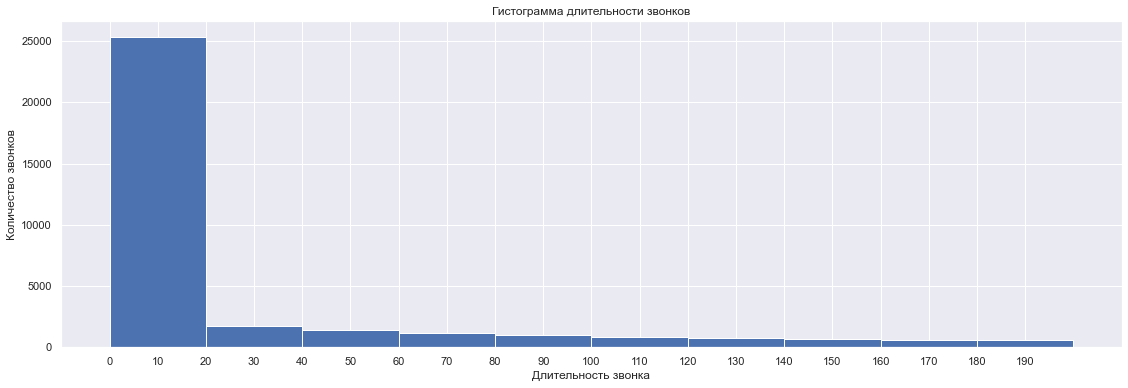

In [10]:
#визуализация
plot_call_duration_hist(column='call_duration', range=(0, 200), 
                        xticks=range(0, 200, 10), yticks=range(0, 30000, 5000), title='Гистограмма длительности звонков')

#### Вывод

Более 25000 звонков, что более половины, длятся 20 единиц времени, что позволяет сделать вывод о том, что представленные единицы времени в данных- минуты.

### Исследование пропусков

In [11]:
#доля пропускав
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
date,0.000000
direction,0.000000
internal,0.200000
operator_id,15.200000
is_missed_call,0.000000
calls_count,0.000000
call_duration,0.000000
total_call_duration,0.000000


Доля пропусков в признаке 'operator_id' = 15,2%, internal - 0,2%. Доля internal минимальна, соответственно строки с пропущенными значениями следует удалить.

In [12]:
#удаление строк с пропущенными значениями в столбце internal
df.drop(df[df.internal.isna()].index, inplace=True)

In [13]:
#проверка
df.shape

(53785, 9)

Удаление выполненно корректно. В признаке 'operator_id' количество пропусков слшком велико. В дальнейшем, возможно изучение распределения операторов с процущенными значениями идентификаторов по КЦ. Для обеспечения корректности анализа данных, будет произведена замена значения NaN на '1'.

In [14]:
#замена пропущенных занчений 
df['operator_id'] = df.operator_id.fillna(1)

Тип float в признаке operator_id не имеет функционального значения, следовательно допустимо изменение типа на int. 

In [15]:
#приведение типов 
df['operator_id'] = df.operator_id.astype(int)

In [16]:
#проверка
df.operator_id.dtypes

dtype('int32')

#### Вывод

Были обработыны пропуски в признаках 'operator_id' и 'internal'. Доли составляли 15,2 и 0,2 соответственно. Строки с пропущенными значениями в 'internal' были удалены ввиду их незначительного количества, в 'operator_id' - заменены на '1'. Также тип 'operator_id' был преобразован в int. 

### Обработка дубликатов

In [17]:
#проверка дубликатов
df.duplicated().sum()

4893

Предоставленные данные являются результатом агрегации, что объясняет появление дубликатов, следовательно дубликаты подлежат удалению.

In [18]:
#доля будликатов от общего количества
round(df.duplicated().mean(), 2) * 100

9.0

In [19]:
#удаление дубликатов
df = df.drop_duplicates()

In [20]:
#проверка
df.shape

(48892, 9)

#### Вывод

Ввиду того, что предоставленные выводы являются агрегированными, явные дубликаты были удалены. Процент удаленных дубликатов - 9%. Количество оставшихся строк - 48892.

### Исследование аномальных значений

#### Оценка временного интервала

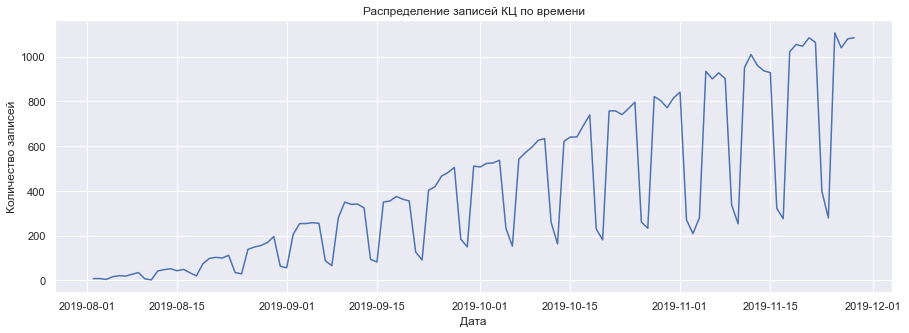

In [21]:
#распределение записей КЦ по времени
ax = df.groupby('date')['user_id'].count().plot(grid=True, figsize=(15,5))
ax.set_title('Распределение записей КЦ по времени')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество записей')
plt.show()

In [22]:
#определение временного периода в данных
display(df.date.min())
display(df.date.max())

datetime.date(2019, 8, 2)

datetime.date(2019, 11, 28)

Предоставленные данные представлены с 2019-08-02 по 2019-11-28. Распределение данных в динамике демонстрирует устройчивый рост количества записей от начала временного отрезка к его концу. Провалы в данных (по 4 на месяц - соответствует количеству недель) свидетельствуют, что в работе КЦ существенно меньше обращений в выходные дни. В начале датафрейма наблюдается неустойчивость данных, что может исказить результаты, следоватьльно неустойчивый период следует отсечь. 

In [23]:
#группировка данных по дате и числу уникальных колл центов
clients_amount = (df.groupby('date').agg({'user_id':'nunique'})).reset_index() 

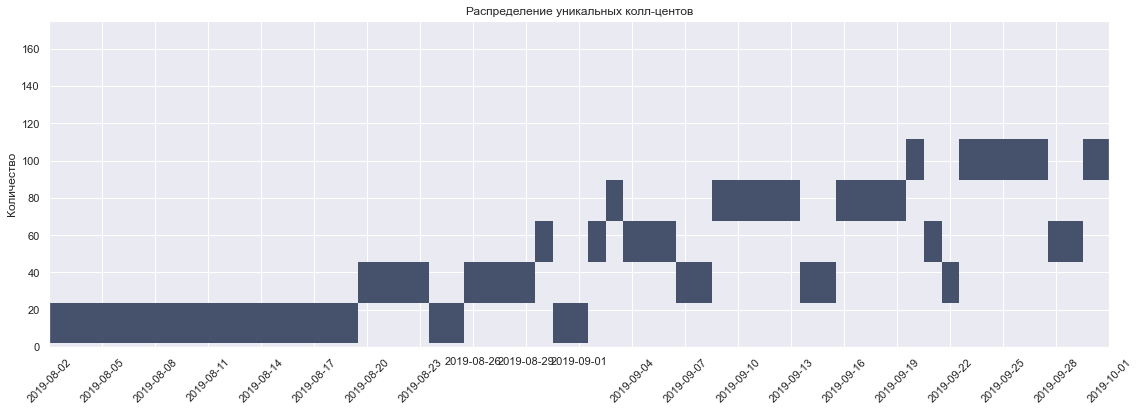

In [24]:
#визуализация
plt.figure(figsize=(19, 6))
sns.histplot(data=clients_amount, x='date', y='user_id' , kde=True)
plt.title('Раcпределение уникальных колл-центов')
plt.xlabel('')
plt.ylabel('Количество')
date_start = datetime(2019, 8, 2)
date_end = datetime(2019, 10, 1)
plt.xlim(date_start, date_end)
plt.ylim(0, 175)
plt.xticks(rotation=45)
locator = mdates.DayLocator(interval=3)
plt.gca().xaxis.set_major_locator(locator)
plt.grid(True)
plt.show()

На графике отмечаетя установочный педиод до первого сентября, далее происходит стабильный, постоянный рост.

In [25]:
#нахождения даты начала роста
clients_amount.head(40)

,date,user_id
0,2019-08-02,2
1,2019-08-03,2
2,2019-08-04,2
3,2019-08-05,3
4,2019-08-06,6
5,2019-08-07,5
6,2019-08-08,11
7,2019-08-09,12
8,2019-08-10,6
9,2019-08-11,2


In [26]:
#установка даты начала роста
date_str = '2019-08-25'
date_obj = datetime.strptime(date_str, '%Y-%m-%d').date()
#отсечение установочного периода
df = df.query('date > @date_obj')
#проверка
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
89,166377,2019-08-26,out,True,880022,True,3,0,0
90,166377,2019-08-26,in,False,880028,False,2,285,302
91,166377,2019-08-26,out,False,880026,False,28,3298,3395
92,166377,2019-08-26,out,False,880028,True,4,0,241
93,166377,2019-08-26,out,False,880022,False,3,1079,1093


В результате выполненных действий, были отсечены даные да 26 августа, что позволит повысить точность анализа.

#### Общая оценка

In [27]:
#проверка данных
df.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000
mean,167309.998810,779847.445268,16.386069,858.497265,1146.386799
std,594.591677,327723.751526,63.711702,3730.857329,4399.298515
min,166377.000000,1.000000,1.000000,0.000000,0.000000
25%,166833.000000,891158.000000,1.000000,0.000000,47.000000
50%,167175.000000,906866.000000,4.000000,39.000000,211.000000
75%,167827.000000,930660.000000,12.000000,574.000000,903.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


В признаках 'calls_count' , 'call_duration' и 'total_call_duration' явно присутствуют выбросы исходя из разницы средних значений и максимальных.

#### Признак total_call_duration

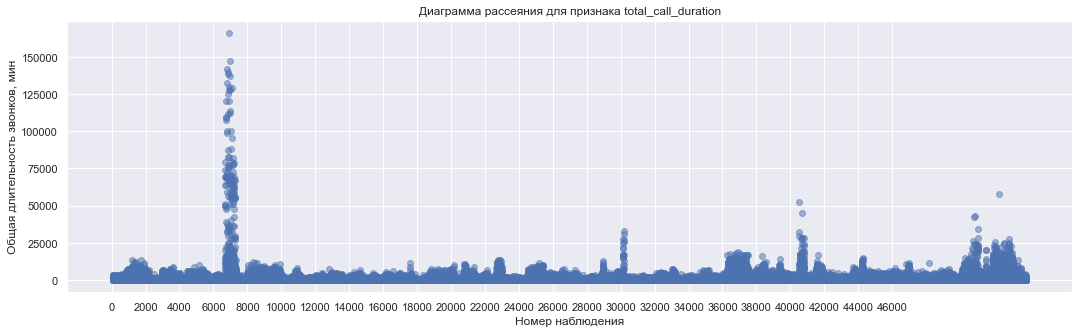

In [28]:
#визуализация total_call_duration
scatter_plot(df, 'Номер наблюдения', 'Общая длительность звонков, мин',
             'Диаграмма рассеяния для признака total_call_duration', 2000)

Очевидная проблема, помимо выбросов - сбой в записях в диапазоне от 6500 до 8500. 

In [29]:
#выявление проблемного КЦ
temp = df.loc[(df.index >= 6500) & (df.index <= 8500)]

In [30]:
#проверка проблемного КЦ
temp.total_call_duration.describe()

count      1551.000000
mean       7375.037395
std       20621.667562
min           0.000000
25%          58.000000
50%         425.000000
75%        2787.000000
max      166155.000000
Name: total_call_duration, dtype: float64

Медианное значение - 437 секунд, что составляет 7,28 минут. В этом случае, медианное значение более информативно, потому как выбросы всё же присутствуют. Значение 7,28 - вполне реалистично.

In [31]:
temp = temp[temp.total_call_duration > 25000]
temp.user_id.unique()

array([166582], dtype=int64)

Очевидно, КЦ с идентификатором 166582 - главный поставщик некорректных данных. Нельзя исключать вероятность того, что именно этот КЦ фиксирует данные в секундах.

In [32]:
#перевод значений для проблемного КЦ в минуты
df.loc[df['user_id'] == 166582, ['total_call_duration', 'call_duration']] /= 60

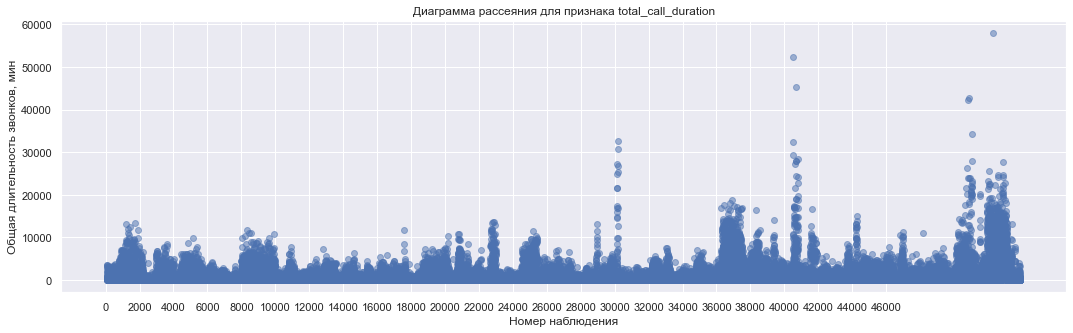

In [33]:
#визуализация total_call_duration после изменений
scatter_plot(df, 'Номер наблюдения', 'Общая длительность звонков, мин',
             'Диаграмма рассеяния для признака total_call_duration', 2000)

После изменений всё еще наблюдаются всплески, однако уже не такие явные. Следует посмотреть на распределение звонков.

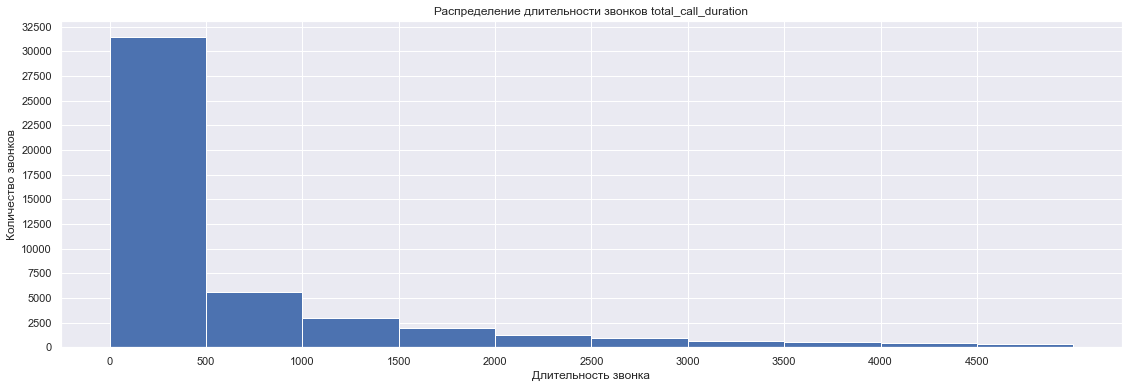

In [34]:
#визуализация
plot_call_duration_hist(column='total_call_duration', range=(0, 5000), 
                        xticks=range(0, 5000, 500), yticks=range(0, 35000, 2500), 
                        title='Распределение длительности звонков total_call_duration')

32 тысячи звонков длятся не более 500 минут или 8,33 часа. 

#### Признак call_duration

Визуализация "call_duration"  - боллее 35 тысяч записей в датафрейме по признаку "call_duration" длятся не более 500 минут (8,33 часа). 

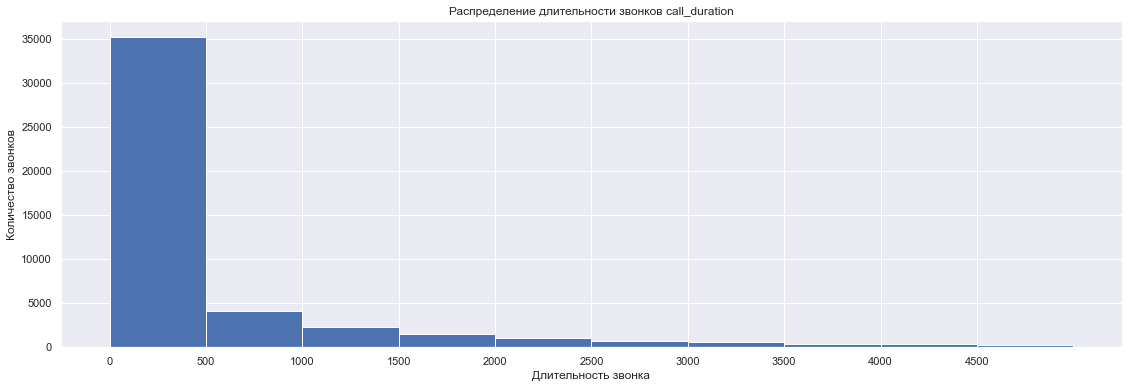

In [35]:
#визуализация
plot_call_duration_hist(column='call_duration', range=(0, 5000), 
                        xticks=range(0, 5000, 500), yticks=range(0, 40000, 5000), 
                        title='Распределение длительности звонков call_duration')

При выборе пороговых значений для отсечения аномалий следует учесть, что КЦ вероятно работает 24 часа, следовательно пороговым значением будет являться 1440.

#### Срез данных

In [36]:
#оценка потерь
round(df.query('call_duration > 1440').shape[0] / df.shape[0], 2)

0.14

In [37]:
#срез данных по признаку call_duration <= 1440
df = df.query('call_duration <= 1440')

Потери данных составили - 14%.

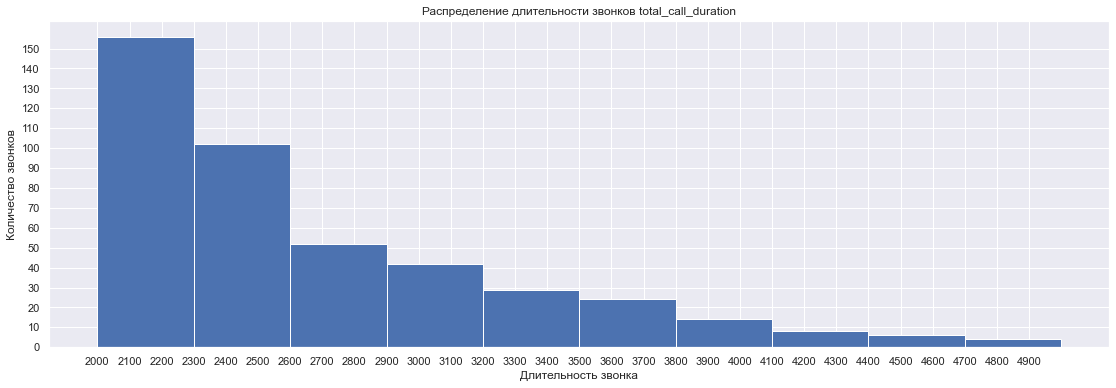

In [38]:
#оценка total_call_duration после среза
plot_call_duration_hist(column='total_call_duration', range=(2000, 5000), 
                        xticks=range(2000, 5000, 100), yticks=range(0, 160, 10), 
                        title='Распределение длительности звонков total_call_duration')

Чтобы отсечь все экстримально высокие значения, определяем пороговое значение для среза - 2600.

In [39]:
#оценка потерь перед срезом
round(df.query('total_call_duration > 2600').shape[0] / df.shape[0], 3)* 100

0.6

In [40]:
#срез данных по признаку total_call_duration <= 2500
df = df.query('total_call_duration <= 2600')

Процент потерь составил 0,6%.

#### Признак calls_count 

In [41]:
df.calls_count.describe()

count    41187.000000
mean        11.019351
std         48.663970
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       2168.000000
Name: calls_count, dtype: float64

В этом признаке 75% значений на отметке 8 звонков, при максимальном - 2168.

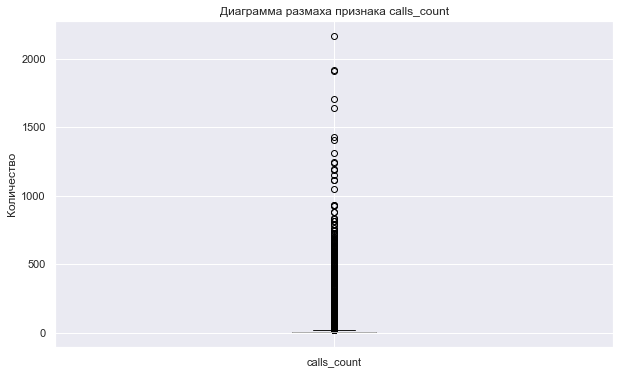

In [42]:
#диаграмма размаха
plt.figure(figsize=(10, 6))
df.boxplot(column='calls_count')
plt.title('Диаграмма размаха признака calls_count')
plt.ylabel('Количество')
plt.show()

Диаграмма размаха показывает наличие выбросов, далее будет произведено отсечение строк, где в признаке calls_count значене превышает 1000.

In [43]:
#количество строк, превышающие порог
df.query('calls_count > 1000').shape[0]

16

Количество строк превышающих порог в 1000 - 16.

In [44]:
#исключение значений превышающее порог
df = df.query('calls_count < 1000')

In [45]:
#оценка размера датафрейма
df.shape

(41171, 9)

#### Признак is_missed_call

В этом признаке данные могут быть записаны некорректно, значение True(звонок пропущен) может быть при отличного от 0 значения call_daration и значение False(звонок принят) при нулевом значении времени разговора.

In [46]:
#оценка корректности записи в признаке is_missed_call
df.is_missed_call.dtypes

dtype('bool')

In [47]:
#количество некорректных значений
df.query('(is_missed_call == True) & (call_duration > 0)').shape[0]

291

In [48]:
#количество некорректных значений
df.query('(is_missed_call == False) & (call_duration == 0)').shape[0]

17

In [49]:
#замены значений признака is_missed_calls
df.loc[(df['is_missed_call'] == True) & (df['call_duration'] > 0), 'is_missed_call'] = False
df.loc[(df['is_missed_call'] == False) & (df['call_duration'] == 0), 'is_missed_call'] = True

In [50]:
#проверка
display(df.query('(is_missed_call == True) & (call_duration > 0)').shape[0])
display(df.query('(is_missed_call == False) & (call_duration == 0)').shape[0])

0

0

Данные корректны

### Вывод по предобработке данных

В этом разделе была выполена предобработка данных. В ходе исследования, доля отсеченных строк - 22%, 9% из которых - дубликаты. Наибольшее количество данных было отсечено на основе аномальных значений в признаке call_duration. Далее были определены пороговые значения для аномальных значений в признаках total_call_duration и calls_count, значения выше пороговых быле отсечены.

Данные представлены с 2019-08-02 по 2019-11-28. Объем данных имеет постоянный рост от минимальной дате датасета к максимальной. Отмечены провалы в данных, по 4 в каждом месяце, что свидетельствует о том, что нагрузка КЦ в выходные дни - существенно меньше относительно будних дней.

Единицы измерения времени в признаках call_duration и total_call_duration - минуты, однако выявлен КЦ с идентификатором 166582, данные которого ппредставленны в секундах.

Также наблюдался ряд неккоректных соответствий в признаке is_missed_calls. При метке, что звонок пропущен, в признаке call_duration ,были выявлены отличные от нулевых значения. При метке, что звонок принят - фигурировали нулевые значения в признаке call_duration.

Все необходимые преобразования выполнены, данные готовы к анализу.


## Исследовательский анализ данных

### Общее количество КЦ и операторов

In [51]:
#количество КЦ
df.user_id.nunique()

304

In [52]:
#количество операторов
df.operator_id.nunique()

1075

В датасете представлено 304 колл центров и 1075 оператор. Далее необходимо выполнить проверку принадлежности операторов к КЦ. Идентификатор 1 - это маркер операторов идентификатор которого не определен, поэтому следует исключить это значение из выборки. Распределение опрераторов с этим идентификатором будет рассмотрено позднее.

In [53]:
#проверка соответствия операторов КЦ
temp = df[df['operator_id'] != 1].groupby('operator_id')['user_id'].nunique()

# Проверить, что для каждого оператора количество уникальных колл-центров равно 1
if (temp == 1).all():
    print("Каждому оператору соответствует один КЦ")
else:
    print("Одному или нескольким операторам соответствуют несколько КЦ")

Каждому оператору соответствует один КЦ


In [54]:
#проверка соответствия КЦ операторам
temp = df[df['operator_id'] != 1].groupby('user_id')['operator_id'].nunique()

# Проверить, есть ли значение 0 в количестве операторов для каждого колл-центра
if (temp == 0).any():
    print("Есть КЦ без операторов")
else:
    print("Во всех КЦ есть хотя бы один оператор")

Во всех КЦ есть хотя бы один оператор


#### Вывод

Общее количество КЦ, представленных в датасэте - 304, операторов - 1075. Каждому оператору соответствует один КЦ, КЦ без операторов нет.

### Определение долей входящих/исходящих вызовов

In [55]:
#исключение неотвеченных
df_temp = df.query('is_missed_call == False')
#доли заведений от общего количества
temp = pd.DataFrame({
    'calls': ['входящие', 'исходящие'],
    'percent': [
        round(df_temp.calls_count[df_temp['direction'] == 'in'].sum() / df_temp.calls_count.sum() * 100, 2),
        round(df_temp.calls_count[df_temp['direction'] == 'out'].sum() / df_temp.calls_count.sum() * 100, 2)
    ]
})

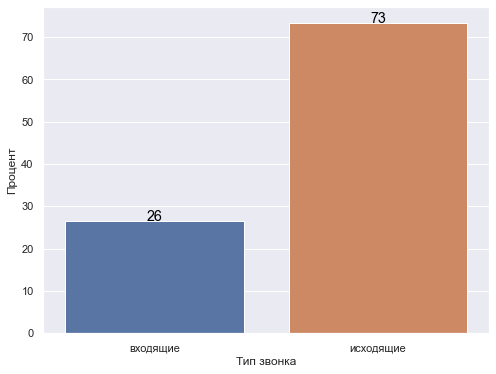

In [56]:
#визуализация
plt.figure(figsize=(8,6))
sns.set()
ax = sns.barplot(data=temp, x=temp.calls, y=temp.percent)
plt.xlabel('Тип звонка',fontsize=12)
plt.ylabel('Процент',fontsize=12)

# добавляем значения на столбцы
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            int(p.get_height()), # округляем до целого числа
            ha='center', 
            size='large',
            color='black')

plt.show()

#### Вывод

Отношение входящих вызовов ко всем - 26%, исходящих - 73%

### Распределение операторов по КЦ

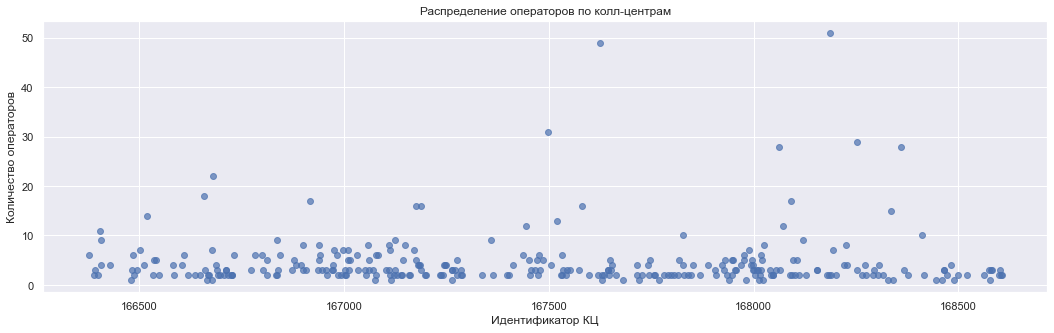

In [57]:
#группировка данных
temp = df.groupby('user_id')['operator_id'].nunique()
#диаграмма рассеяния распределения опреаторов
fig, ax = plt.subplots(figsize=(18, 5))
ax.scatter(temp.index, temp.values, alpha=0.7)
ax.set_title('Распределение операторов по колл-центрам')
ax.set_xlabel('Идентификатор КЦ')
ax.set_ylabel('Количество операторов')
plt.grid(True)
plt.show()

In [58]:
#КЦ с максимальным числом операторов
temp.to_frame().reset_index().sort_values(by='operator_id', ascending = False).head(2)

,user_id,operator_id
261,168187,51
172,167626,49


In [59]:
#число КЦ с одним оператором
counts = temp.value_counts()
counts[1]

20

In [60]:
#количество КЦ по числу операторов
counts = temp.value_counts()
count_more_10 = counts.loc[lambda x: x.index > 10].sum()
count_less_10 = counts.loc[lambda x: x.index <= 10].sum()
count_one = counts.loc[lambda x: x.index == 1].sum()


#результаты
print("Количество колл-центров с 10 и более операторами:", count_more_10)
print("Количество колл-центров с менее чем 10 операторами:", count_less_10)
print("Количество колл-центров с одним оператором:", count_one)

Количество колл-центров с 10 и более операторами: 19
Количество колл-центров с менее чем 10 операторами: 285
Количество колл-центров с одним оператором: 20


Вычисление КЦ без неидентифицированных операторов

In [61]:
#формирование списка КЦ, где есть неидентифицированные операторы
temp = df.query('operator_id == 1')
temp = temp.user_id.unique().tolist()
#формирование списка всех уникальных КЦ
temp2 = df.user_id.unique().tolist()
#преобразование списков в множества и нахождение разности
result = set(temp2) - set(temp)
result

{166677, 167682, 168459}

Неидентифицированные операторы, которые были помечены "1" - присутствуют в 304 из 307 КЦ. 

#### Вывод

В большей части КЦ не более 10 операторов, 2 самых крупных КЦ (168187 и 167626) используют порядка 50 операторов. В 285 КЦ менее 10 операторов, в 19 более 10. Число КЦ с одним оператором - 20. Неидентифицированные операторы присутствуют в 304 из 307 КЦ. КЦ, где все операторы идентифицированны - 167682, 168459, 166677.

### Оценка способов взаимодействия операторов и клиентов

In [62]:
#оценка работы КЦ со звонками по категориям
#только входящие
in_cc = round(df[df['direction'] == 'in']['user_id'].nunique() /  df.user_id.nunique(), 2) * 100
#только исходящие
out_cc = round(df[df['direction'] == 'out']['user_id'].nunique() /  df.user_id.nunique(), 2) * 100
#комбинированные
in_out_cc = round(df.groupby('user_id')['direction'].nunique().eq(2).sum() /  df.user_id.nunique(), 2) * 100

#вывод
print(f'Доля КЦ в in: {in_cc} процентов')
print(f'Доля КЦ в out: {out_cc} процента')
print(f'Доля КЦ в in и out одновременно: {in_out_cc} процента')

Доля КЦ в in: 100.0 процентов
Доля КЦ в out: 72.0 процента
Доля КЦ в in и out одновременно: 72.0 процента


In [63]:
#оценка работы операторов со звонками по категориям
#только входящие
in_operators = round(df[df['direction'] == 'in']['operator_id'].nunique() / df.operator_id.nunique(), 2) * 100
#только исходящие
out_operators = round(df[df['direction'] == 'out']['operator_id'].nunique() / df.operator_id.nunique(), 2) * 100
#комбинированные
in_out_operators = round(df.groupby('operator_id')['direction'].nunique().eq(2).sum() / df.operator_id.nunique(), 2) * 100

#вывод
print(f'Доля операторов в in: {in_operators} процентов')
print(f'Доля операторов в out: {out_operators} процент')
print(f'Доля операторов в in и out одновременно: {in_out_operators} процентов')

Доля операторов в in: 69.0 процентов
Доля операторов в out: 81.0 процент
Доля операторов в in и out одновременно: 50.0 процентов


#### Вывод

Согласно произведенным расчётам, нет явного признака, который определял бы чёткое разграничение КЦ по специализации. 72% КЦ работают одновременно с входящими и исходящими вызовами и 50% операторов также обрабатывают обе категории звонков.

### Оценка доли внутренних звонков

В исходных данных присутствуют внутренние звонки. Произведем оценку их количества.

In [64]:
#расчет количества внутренних звонков
sum_calls_internal = df.loc[df['internal'] == True, 'calls_count'].sum()
#расчет общего количества звонков
sum_calls_total = df['calls_count'].sum()
#расчет процента внутренних звонков
percent_internal = sum_calls_internal / sum_calls_total * 100
#формирование датафрейма
temp = pd.DataFrame({
    'calls': ['Internal', 'Other'],
    'percent': [
        round(sum_calls_internal / sum_calls_total * 100, 2),
        round(100 - percent_internal, 2)
    ]
})

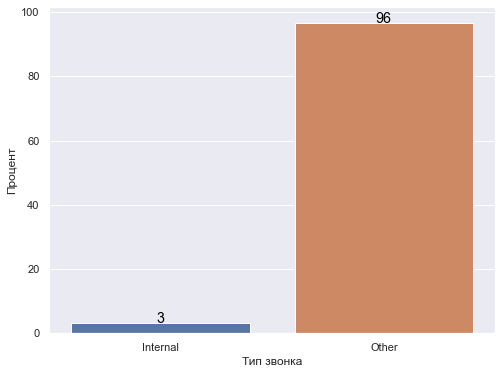

In [65]:
#визуализация
plt.figure(figsize=(8,6))
sns.set()
ax = sns.barplot(data=temp, x=temp.calls, y=temp.percent)
plt.xlabel('Тип звонка',fontsize=12)
plt.ylabel('Процент',fontsize=12)

# добавляем значения на столбцы
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            int(p.get_height()), # округляем до целого числа
            ha='center', 
            size='large',
            color='black')

plt.show()


3% от общего количества, несущественное значение.

### Разделение КЦ по специализации

Согласно ТЗ необходимо разделить КЦ по специализации:

- обрабтка входящих вызовов;
- совершение исходящих вызовов.

Для определения специализации, датафрейм будет сгруппирован по идентификатору КЦ и направлению вызова, а также будет просуммирован признак call_duration. После чего будет произведено сравнение сумм между 'in' и 'out' признака direction. В случае разницы в пользу 'in' - КЦ присваивается литера I, в обратном случае - O.

- I - входящие вызовы
- O - исходящие вызовы

In [66]:
#группировка данных
grouped = df.groupby(['user_id', 'direction']).agg({'call_duration': 'sum'})
#переформатирование данных с заполением 0 отсутствующих значений
pivot = grouped.pivot_table(values='call_duration', index='user_id', columns='direction', fill_value=0)
#создание нового столбца
pivot['type'] = 'I'
#условие, при котором литера меняется на В
pivot.loc[pivot['out'] > pivot['in'], 'type'] = 'O'
#объединение данных с основным датафреймом по признаку user_id
df = pd.merge(df, pivot[['type']], on='user_id')

In [67]:
#подготовка данных для визуализации
temp = df.type.value_counts().to_frame().reset_index()
temp = temp.rename(columns={'index': 'type', 'type': 'count'})

In [68]:
temp['percent'] = round(temp['count'] / temp['count'].sum(), 2)
temp[['type', 'percent']]

,type,percent
0,O,0.58
1,I,0.42


#### Вывод

Выполнено разделение КЦ путем добавление литер согласно специализации:

- I - входящие вызовы
- O - исходящие вызовы

Доли каждой группы от общего числа значений:

- O - 58%
- I - 42%

### Критерии и расчёт пороговых значений для определения эффективности оператора

Будут рассмотрены следующие критерии оценки эффективности операторов:

Для входящих:

- Количество пропущенных 

    *Требуется определить долю пропущенных звонков от общего количества и согласно этому определить порог эффективности каждого оператора*
    
    
- Время ожидания

    *Необходимо определить в какой момент пользователь кладет трубку и на основе этого значения определить порог эффективности*
    
    
Для исходящих:

- Количество звонков

    *Оценить длину смены операторов, вычислить типичную длительность звонка и на основе этих параметров определить порог эффективности каждого оператора*

#### Входящие КЦ. Количество пропущенных

Первым шагом - следует произвести срез данных из основного датафрейма с условиями:

- направление вызовов - 'in'
- тип 'I'
- is_missed_call == True

In [69]:
#срез данных по признаку type
#и направления звонка - in потому как КЦ позиционируется как принимающий
df_a = df.query('type == "I" & direction == "in" & is_missed_call == True')

In [70]:
#группировка данных по КЦ
total_calls_by_center = df_a.groupby('user_id').agg({'calls_count': 'sum', 'is_missed_call': lambda x: sum(x == True)})
#расчёт процентов
total_calls_by_center['missed_calls_percentage'] = total_calls_by_center['is_missed_call'] / total_calls_by_center['calls_count'] * 100

In [71]:
#проверка
final_value = total_calls_by_center.reset_index()
final_value

,user_id,calls_count,is_missed_call,missed_calls_percentage
0,166391,7,7,100.000000
1,166392,85,38,44.705882
2,166399,9,7,77.777778
3,166405,4388,100,2.278943
4,166428,38,29,76.315789
...,...,...,...,...
173,168578,1,1,100.000000
174,168579,133,26,19.548872
175,168583,18,11,61.111111
176,168598,80,13,16.250000


Прежде чем отсекать кричические значения, определим КЦ с процентом пропущенных в 100%, потому как это потенциально максимально заинтересованные в разрабатываемом сервисе клиенты.

In [72]:
#отсечение значений
high_missed = total_calls_by_center.query('missed_calls_percentage == 100')
high_missed.index

Int64Index([166391, 166585, 166649, 166671, 166697, 167003, 167139, 167981,
            167998, 168202, 168303, 168340, 168490, 168578],
           dtype='int64', name='user_id')

Наибольший процент потерь в КЦ с идентификаторами:
- 166391 
- 166585 
- 166649 
- 166671
- 166697
- 167003
- 167139
- 167981
- 167998
- 168202
- 168303
- 168340
- 168490
- 168578

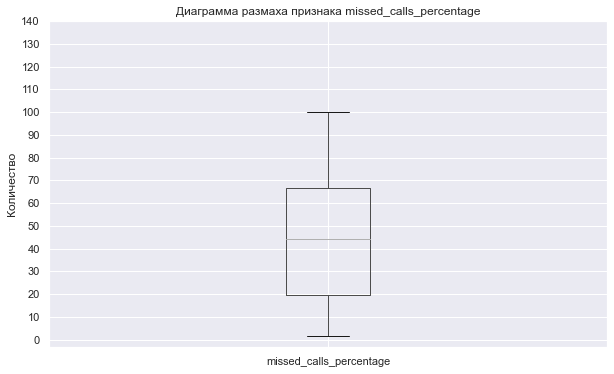

In [73]:
#диаграмма размаха
plt.figure(figsize=(10, 6))
axes = final_value.boxplot(column='missed_calls_percentage')
axes.set_yticks(range(0, 150, 10))
plt.title('Диаграмма размаха признака missed_calls_percentage')
plt.ylabel('Количество')
plt.show()

Выбросов не обнаружено.

In [74]:
final_value.missed_calls_percentage.describe().to_frame()

,missed_calls_percentage
count,178.000000
mean,45.002549
std,28.516111
min,1.555556
25%,19.595865
50%,44.040404
75%,66.666667
max,100.000000


В результате получаем, что 75% операторов по всем КЦ пропускают не более 66% от всех звонков, другими словами - 25% операторов пропускают более 66% звонков. Однако, следует учесть, что сама по себе метрика не может служить абсолютным показателем эффективности, потому как в случае если один оператор успевает обрабатывать 500 звонков при 66% пропущеных и другой оператор 100 при 66% пропущенных, их эффективность не может быть на одном уровне, поэтому необходимо добавить вторую метрику - время ожидания. Эта метрика позволит определить количество клиентов, которых успевает обслужить оператор, следовательно точнее определить эффективность каждого оператора. 

In [75]:
#срез данных
total_calls_by_center2 = total_calls_by_center.query('missed_calls_percentage > 66')
total_calls_by_center2.reset_index().user_id.count()

48

В 48 КЦ наблюдаются есть операторы, чьи показатели по этой метрике выше порогового значения.

Также в датасете были определены операторы без идентификатора, в ходе предопработки которым был присвоен идентификатор '1'. Следует оценить количество пропущенных вызовов для данного идентификатора.

In [76]:
#число звонков, где оператор не определен
no_id_count = df_a.calls_count[df_a.operator_id == 1].sum()

In [77]:
#число пропущенных звонков
total_missed = df_a.calls_count[df_a.is_missed_call == True].sum()

In [78]:
#доля пропущенных вызовов на операторов без id
round(no_id_count / total_missed, 2)

0.99

Из всех пропущенных вызовов - 99% приходится на операторов без идентификатора. При поступлении звонка в КЦ, он направляется в очередь ожидания. По всей видимости, клиент не дождавшись ответа, кладет трубку, соответственно записи не присваивается идентификатор оператора. 

#### Входящие КЦ. Время ожидания

Под временем ожидания подразумевается время, когда большинство клиентов кладет трубку. В первую очередь необходимо добавить столбец с разностью признаков total_call_duration и call_duration. Именно это значение показывает время ожидания до момента, когда оператор отвечает на звонок.

In [79]:
#добавление столбца с временем ожидания
df_a_wait = df.query('type == "I" & direction == "in" & is_missed_call == False')
df_a_wait = df_a_wait.copy()
df_a_wait['wait_time'] = (df_a_wait.total_call_duration - df_a_wait.call_duration) / df_a_wait.calls_count

In [80]:
#проверка
df_a_wait.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type,wait_time
340,166391,2019-09-23,in,False,882476,False,1,4.0,24.0,I,20.0
346,166391,2019-11-22,in,False,882476,False,1,13.0,77.0,I,64.0
350,166392,2019-08-29,in,False,891900,False,1,4.0,46.0,I,42.0
353,166392,2019-09-05,in,False,891906,False,1,7.0,32.0,I,25.0
354,166392,2019-09-11,in,False,891906,False,1,86.0,117.0,I,31.0


Далее будет сформированна таблица по КЦ со средними значениями времени ожидания.

In [81]:
#группировка данных
total_waiting_by_center = df_a_wait.groupby('user_id').agg({'wait_time': 'mean'})

Проверка данных на выбросы

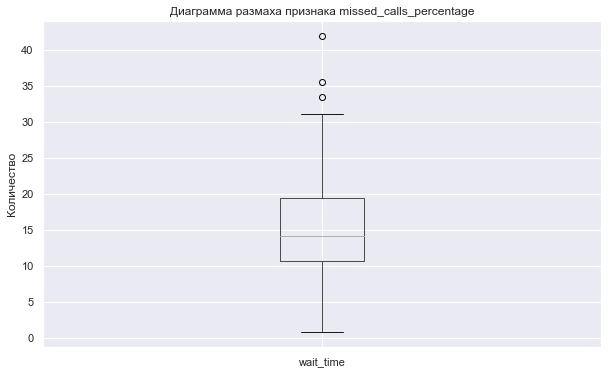

In [82]:
#диаграмма размаха
plt.figure(figsize=(10, 6))
axes = total_waiting_by_center.boxplot(column='wait_time')
axes.set_yticks(range(0, 45, 5))
plt.title('Диаграмма размаха признака missed_calls_percentage')
plt.ylabel('Количество')
plt.show()

Для получения более корректных значений, отсечем данные превышающие 32 минут.

In [83]:
#срез выбросов
final_value_waiting = total_waiting_by_center.query('wait_time < 32')
final_value_waiting.wait_time.describe().to_frame()

,wait_time
count,156.000000
mean,14.762282
std,6.733406
min,0.750000
25%,10.616446
50%,14.035714
75%,19.010417
max,31.197826


В результате получаем пороговое значение в 10,6 минут, т.е. 75% клиентов ждут не более 10,6 минут. Округлим значение до 10 минут. .

In [84]:
#срез данных
final_value_waiting = final_value_waiting.query('wait_time > 10')
final_value_waiting.head()

,wait_time
user_id,
166392,31.197826
166399,23.125000
166405,23.826667
166428,15.235417
166482,18.340000


##### Вывод

Определены пороги эффективности для входящих вызовов:

- количество пропущенных - менее 66%
- время ожидания - не более 10 минут

#### Исходящие КЦ. Количество звонков

Для вычисления порогового значения, необходимо вычислить типичную длительность звонка, а также определить длину смены операторов.

In [85]:
#срез данных
df_b = df.query('type == "O" & direction == "out" & is_missed_call == False')

In [86]:
df_b.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type
3,166377,2019-08-26,out,False,880022,False,3,1079.0,1093.0,O
4,166377,2019-08-26,out,False,880028,False,5,426.0,487.0,O
16,166377,2019-08-30,out,False,880022,False,1,239.0,257.0,O
17,166377,2019-08-30,out,False,880028,False,14,989.0,1099.0,O
31,166377,2019-09-04,out,False,880022,False,3,360.0,395.0,O


In [87]:
#группировка данных по операторам
df_operator = df_b.groupby(['date', 'operator_id']).agg({'total_call_duration':'sum', 'calls_count':'sum'}).reset_index()
#добавление столбца с часами
df_operator['hours'] = df_operator.total_call_duration / 60
#проверка
df_operator

,date,operator_id,total_call_duration,calls_count,hours
0,2019-08-26,879896,311.0,2,5.183333
1,2019-08-26,879898,264.0,6,4.400000
2,2019-08-26,880022,1093.0,3,18.216667
3,2019-08-26,880028,487.0,5,8.116667
4,2019-08-26,884412,1585.0,10,26.416667
...,...,...,...,...,...
6411,2019-11-28,970242,1146.0,3,19.100000
6412,2019-11-28,970244,12.0,1,0.200000
6413,2019-11-28,970252,188.0,2,3.133333
6414,2019-11-28,970254,152.0,4,2.533333


In [88]:
#функция рабочего дня
def workday(hours):
    if hours < 9:
        return 8
    elif hours >= 13 and hours <= 30:
        return 24
    elif hours >= 9 and hours <= 13:
        return 12
    else:
        return None

In [89]:
#создание признака со значениями смен
df_operator['workday'] = df_operator['hours'].apply(workday)

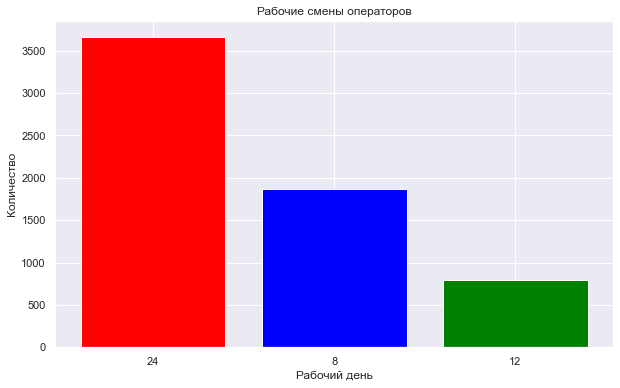

In [90]:
#визуализация
fig = plt.figure(figsize=(10, 6))
plt.bar(['24', '8', '12'], df_operator['workday'].value_counts(), color=['red', 'blue', 'green'])
plt.title('Рабочие смены операторов')
plt.xlabel('Рабочий день')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

Согласно данным, смены операторов бывают 3х типов 24-часовые, 8-часовые и 12 часовые, с явным преобладанием 24-часовых. Однако, не исключена вероятность того, что смены операторов вариативны. В качестве проверки, возмем случайного оператора и проверим эту гипотезу.

In [91]:
#смена случайного оператора
df_operator.workday[df_operator.operator_id == 880022].describe()

count    31.000000
mean     10.451613
std       5.433469
min       8.000000
25%       8.000000
50%       8.000000
75%       8.000000
max      24.000000
Name: workday, dtype: float64

Согласно статистическим значаниям, у этого оператора возможны как 8-ми, так и 24-х часовын рабочие смены. Оценим признак workday.

In [92]:
df_operator.workday.describe()

count    6330.000000
mean       13.224645
std         7.090086
min         8.000000
25%         8.000000
50%         8.000000
75%        24.000000
max        24.000000
Name: workday, dtype: float64

в 50% случаев смены 8 часовые. Посмотрим на распределение значений рабочих часов.

In [93]:
df_operator.hours.describe()

count    6416.000000
mean        9.453486
std         8.274425
min         0.010556
25%         2.350000
50%         7.025000
75%        15.041667
max        42.450000
Name: hours, dtype: float64

Среднее значение на отметке в 9,45 часов. Оценим выбросы на диаграмме размаха.

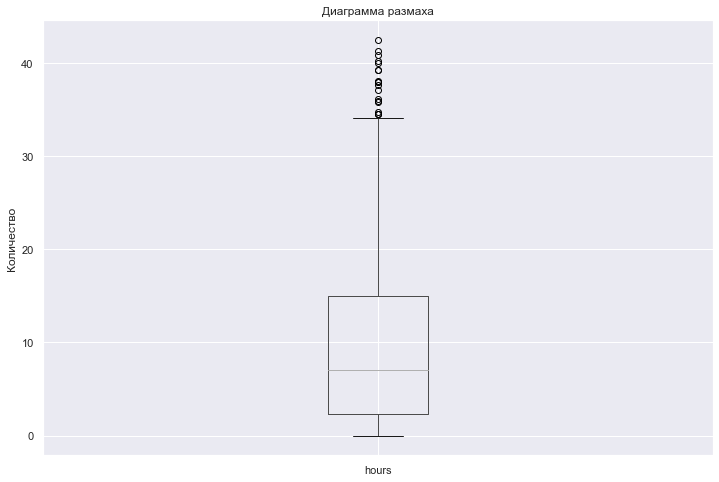

In [94]:
#диаграмма размаха
plt.figure(figsize=(12, 8))
axes = df_operator.boxplot(column='hours')
plt.title('Диаграмма размаха')
plt.ylabel('Количество')
plt.show()

Исключим влияние выбросов на метрику. Так как в сутках не может быть больше 24 часов, исключим значения выше этого порога. 

In [95]:
df_operator = df_operator.query('hours < 25')

In [96]:
df_operator.hours.describe()

count    6052.000000
mean        8.306612
std         6.984152
min         0.010556
25%         2.183333
50%         6.283333
75%        13.337500
max        24.933333
Name: hours, dtype: float64

Среднее значение на отметке 8,3 часа. Определим это значение как величину рабочей смены оператора.

Теперь необходимо расчитать типичную продолжительность звонка, для чего данные будут сгруппированы по признаку operator_id, а также будет выполнена агрегация признаков total_call_duration и calls_count.

In [97]:
#группировка данных
mean_call = df_b.groupby('operator_id').agg({'calls_count': 'sum', 'total_call_duration': 'sum'}).reset_index()
#добавление нового столбца с результатом деления общей продолжительности на количество звонков
mean_call['mean'] = mean_call.total_call_duration / mean_call.calls_count

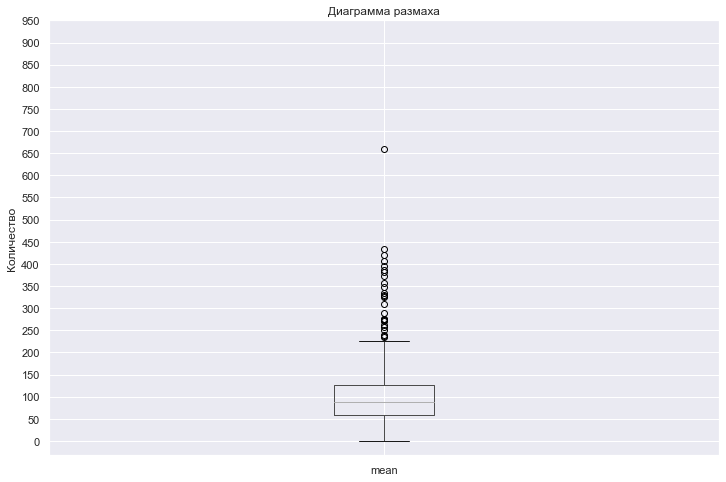

In [98]:
#диаграмма размаха
plt.figure(figsize=(12, 8))
axes = mean_call.boxplot(column='mean')
axes.set_yticks(range(0, 1000, 50))
plt.title('Диаграмма размаха')
plt.ylabel('Количество')
plt.show()

In [99]:
mean_call = mean_call.query('mean < 250')
round(mean_call['mean'].mean(), 2)

91.85

Среднияя продолжительность звонка 91,85 минут или 1,5 часа.

##### Вывод

Согласно расчитаным значениям, при рабочей смене в 8 часов и средней продолжительности звонка в 1,5 часа, количество звонков за смену должно быть не менее 10. При значениях меньше - оператор неэффективен.

### Определение неэффективности операторов

В предидущих разделах были сформированы пороги не эффективности операторов:

Для входящих звонков:

- процент пропущенных звонков менее 66%
- время ожидания - менее 7 минут

Для исходящих звонков, в зависимости от смены

- минимальное количество исходящих звонков за смену не менее 6

#### Входящие вызовы

Формирование итоговой таблицы

In [100]:
#датафрейм с процентами
perc = total_calls_by_center.reset_index()
perc.head()

,user_id,calls_count,is_missed_call,missed_calls_percentage
0,166391,7,7,100.000000
1,166392,85,38,44.705882
2,166399,9,7,77.777778
3,166405,4388,100,2.278943
4,166428,38,29,76.315789


In [101]:
#удаление лишних столбцов
perc = perc.drop(['is_missed_call', 'calls_count'], axis=1)

In [102]:
#датафрейм со временем ожидания
df_a_wait.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type,wait_time
340,166391,2019-09-23,in,False,882476,False,1,4.0,24.0,I,20.0
346,166391,2019-11-22,in,False,882476,False,1,13.0,77.0,I,64.0
350,166392,2019-08-29,in,False,891900,False,1,4.0,46.0,I,42.0
353,166392,2019-09-05,in,False,891906,False,1,7.0,32.0,I,25.0
354,166392,2019-09-11,in,False,891906,False,1,86.0,117.0,I,31.0


In [103]:
#объединение фреймов по признаку user_id
merged_df_a = pd.merge(df_a_wait, perc, on='user_id')
merged_df_a.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type,wait_time,missed_calls_percentage
0,166391,2019-09-23,in,False,882476,False,1,4.0,24.0,I,20.0,100.000000
1,166391,2019-11-22,in,False,882476,False,1,13.0,77.0,I,64.0,100.000000
2,166392,2019-08-29,in,False,891900,False,1,4.0,46.0,I,42.0,44.705882
3,166392,2019-09-05,in,False,891906,False,1,7.0,32.0,I,25.0,44.705882
4,166392,2019-09-11,in,False,891906,False,1,86.0,117.0,I,31.0,44.705882


In [104]:
#применение пороговых значений
sliced_df = merged_df_a[(merged_df_a['missed_calls_percentage'] > 66) & (merged_df_a['wait_time'] > 10)]
sliced_df.operator_id.nunique() 

68

In [105]:
#доля неэффективных
round(sliced_df.operator_id.nunique() / df_a_wait.operator_id.nunique(), 2) * 100

16.0

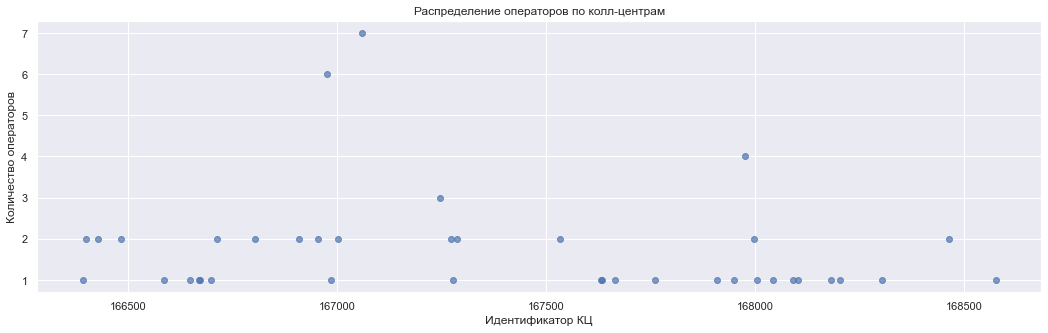

In [106]:
#группировка данных
temp = sliced_df.groupby('user_id')['operator_id'].nunique()
#диаграмма рассеяния распределения опреаторов
fig, ax = plt.subplots(figsize=(18, 5))
ax.scatter(temp.index, temp.values, alpha=0.7)
ax.set_title('Распределение операторов по колл-центрам')
ax.set_xlabel('Идентификатор КЦ')
ax.set_ylabel('Количество операторов')
plt.grid(True)
plt.show()

In [107]:
sliced_df.sort_values(by='missed_calls_percentage', ascending = False).head(15)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type,wait_time,missed_calls_percentage
0,166391,2019-09-23,in,False,882476,False,1,4.0,24.0,I,20.0,100.0
983,166697,2019-08-30,in,False,891646,False,1,46.0,93.0,I,47.0,100.0
2114,167003,2019-09-16,in,False,901492,False,1,246.0,267.0,I,21.0,100.0
2113,167003,2019-09-13,in,False,901492,False,1,77.0,102.0,I,25.0,100.0
2112,167003,2019-09-12,in,False,901492,False,1,112.0,135.0,I,23.0,100.0
2111,167003,2019-09-10,in,False,901498,False,1,23.0,83.0,I,60.0,100.0
2110,167003,2019-09-06,in,False,901492,False,1,3.0,28.0,I,25.0,100.0
2108,167003,2019-09-02,in,False,901492,False,2,54.0,82.0,I,14.0,100.0
2107,167003,2019-09-02,in,False,901498,False,1,3.0,34.0,I,31.0,100.0
988,166697,2019-11-15,in,False,891646,False,1,25.0,36.0,I,11.0,100.0


##### Вывод

16% операторов по работе с входящими звонками не эффективны по обоим признакам. Явная проблема с КЦ 168004 - 7 неэффективных операторов с высоким процентом пропущенных звонков и высоким временем ожидания клиента.

#### Исходящие вызовы

In [108]:
#датафрейм для группы B
df_operator

,date,operator_id,total_call_duration,calls_count,hours,workday
0,2019-08-26,879896,311.00,2,5.183333,8.0
1,2019-08-26,879898,264.00,6,4.400000,8.0
2,2019-08-26,880022,1093.00,3,18.216667,24.0
3,2019-08-26,880028,487.00,5,8.116667,8.0
5,2019-08-26,885876,846.95,318,14.115833,24.0
...,...,...,...,...,...,...
6411,2019-11-28,970242,1146.00,3,19.100000,24.0
6412,2019-11-28,970244,12.00,1,0.200000,8.0
6413,2019-11-28,970252,188.00,2,3.133333,8.0
6414,2019-11-28,970254,152.00,4,2.533333,8.0


Применим пороговое значения для определения неэффективных операторов. Для чего создадим новый столбец, куда будет записываться 1 если оператор уложился в план и 0 если нет.

Теперь необходимо сделать выборку операторов, чьё среднее значение в признаке result - 0. Именно они и будут являться неэффективными.

In [109]:
#создание нового столбца
df_operator = df_operator.copy()
df_operator['result'] = df_operator['calls_count'].apply(lambda x: 1 if x >= 6 else 0)
#группировка
grouped_df = df_operator.groupby('operator_id')
#условие фильтрации
filtered_df = grouped_df.filter(lambda x: x['result'].mean() == 0)
filtered_df

,date,operator_id,total_call_duration,calls_count,hours,workday,result
9,2019-08-26,887992,222.0,5,3.700000,8.0,0
14,2019-08-26,891824,66.0,2,1.100000,8.0,0
17,2019-08-26,892800,1376.0,5,22.933333,24.0,0
39,2019-08-27,896430,318.0,5,5.300000,8.0,0
51,2019-08-28,892534,18.0,1,0.300000,8.0,0
...,...,...,...,...,...,...,...
6409,2019-11-28,969286,27.0,1,0.450000,8.0,0
6411,2019-11-28,970242,1146.0,3,19.100000,24.0,0
6412,2019-11-28,970244,12.0,1,0.200000,8.0,0
6413,2019-11-28,970252,188.0,2,3.133333,8.0,0


In [110]:
#количество неэффективных операторов
not_eff = filtered_df.operator_id.nunique()
not_eff

180

In [111]:
#общее число операторов
oper_amount = df_operator.operator_id.nunique()
oper_amount

487

In [112]:
#отношение
round(not_eff / oper_amount, 2) * 100

37.0

Оценим распределение неэффективных операторов по колл центрам, для этого произведем объединение таблиц filtered_df и изначального датафрейма для группы исходящих, чтобы получить идентификаторы КЦ.

In [113]:
#объединение фатафреймов
merged_df = filtered_df.merge(df_b, on='operator_id', how='inner')
#группировка данных
temp2 = merged_df.groupby('user_id')['operator_id'].nunique()

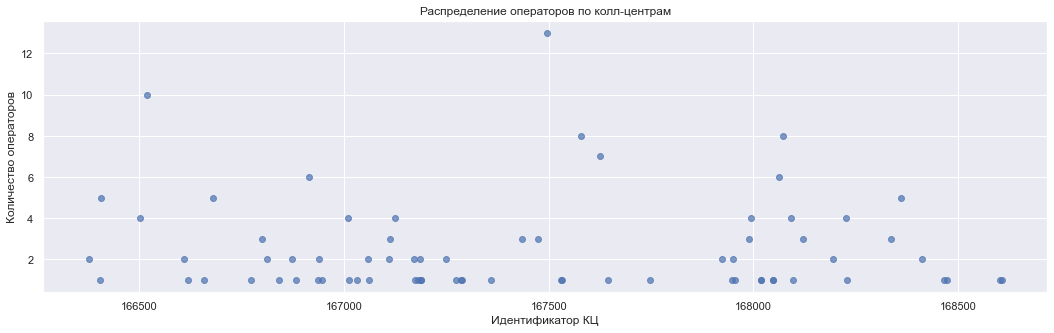

In [114]:
#диаграмма рассеяния распределения опреаторов
fig, ax = plt.subplots(figsize=(18, 5))
ax.scatter(temp2.index, temp2.values, alpha=0.7)
ax.set_title('Распределение операторов по колл-центрам')
ax.set_xlabel('Идентификатор КЦ')
ax.set_ylabel('Количество операторов')
plt.grid(True)
plt.show()

In [115]:
temp2.to_frame().reset_index().sort_values(by='operator_id', ascending = False).head(10)

,user_id,operator_id
40,167497,13
4,166520,10
43,167580,8
58,168073,8
44,167626,7
57,168062,6
15,166916,6
2,166407,5
8,166680,5
66,168361,5


##### Вывод

37% операторов по работе с исходящими вызовами - неэффективны.Есть целый ряд КЦ с большим количеством неэффективных операторов, соответственно потенциальных клиентов сервиса.

### Вывод

Общее количество КЦ, представленных в датасэте - 304, операторов - 1075.

В большей части КЦ не более 10 операторов, 2 самых крупных КЦ (168187 и 167626) используют порядка 50 операторов. 

В данных присутствуют неидентифицированные операторы в 304 из 307и КЦ. 

КЦ, где все операторы идентифицированны - 166677, 167682, 168459.

Выполнено разделение КЦ путем добавление литер согласно специализации:

I - входящие вызовы
O - исходящие вызовы


Доли каждой группы от общего числа значений:

I - 58%
O - 42%

Выявлена зависимоть, что в подавляющем большинстве случаев, где оператору не соответствует идентификатор, звонок является пропущеным.

Наибольший процент потерь входящих звонков в КЦ с идентификаторами:

- 166391 
- 166585 
- 166649 
- 166671
- 166697
- 167003
- 167139
- 167981
- 167998
- 168202
- 168303
- 168340
- 168490
- 168578

По результатам вычислений, были сформированы пороговые значения эффективности операторов:

Для входящих звонков:

- процент пропущенных звонков ниже 66%
- время ожидания - менее 10 минут

Для исходящих звонков:

- минимальное количество исходящих звонков за смену - 6

16% операторов по работе с входящими звонками не эффективны по обоим признакам. Максимальное количество неэффективных операторов в одном КЦ - 7.

37% операторов по работе с исходящими вызовами - неэффективны. Максимальное количество неэффективных операторов для одного КЦ - 13.

## Проверка статистических гипотез

### Гипотеза 1

Формирование нулевой и альтернативной гипотез:

Первая нулевая гипотеза H0 - Для КЦ, работающих со входящими вызовами, доли пропущенных звонков в будние дни и выходные одинаково.

Первая альтернативная гипотеза H1 - Для КЦ, работающих со входящими вызовами, доли пропущенных звонков в будние дни и выходные различается.

In [116]:
#формирование таблицы
df_a_test = df.query('type == "I" & direction == "in" & is_missed_call == True')
df_a_test.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type
338,166391,2019-09-18,in,False,1,True,1,0.0,9.0,I
339,166391,2019-09-20,in,False,1,True,1,0.0,1.0,I
341,166391,2019-09-27,in,False,1,True,1,0.0,2.0,I
342,166391,2019-10-04,in,False,1,True,1,0.0,1.0,I
343,166391,2019-10-12,in,False,1,True,1,0.0,1.0,I


In [117]:
#добавление столбца с порядковым днём недели
df_a_test = df_a_test.copy()
df_a_test['weekday_num'] = df_a_test['date'].apply(lambda x: x.weekday())
#проверка
df_a_test.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type,weekday_num
338,166391,2019-09-18,in,False,1,True,1,0.0,9.0,I,2
339,166391,2019-09-20,in,False,1,True,1,0.0,1.0,I,4
341,166391,2019-09-27,in,False,1,True,1,0.0,2.0,I,4
342,166391,2019-10-04,in,False,1,True,1,0.0,1.0,I,4
343,166391,2019-10-12,in,False,1,True,1,0.0,1.0,I,5


In [118]:
#добавление метки о рабочем или буднем дне
df_a_test['day_type'] = df_a_test['weekday_num'].apply(lambda x: 'business_day' if x <= 4 else 'weekend')
#проверка
df_a_test.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type,weekday_num,day_type
338,166391,2019-09-18,in,False,1,True,1,0.0,9.0,I,2,business_day
339,166391,2019-09-20,in,False,1,True,1,0.0,1.0,I,4,business_day
341,166391,2019-09-27,in,False,1,True,1,0.0,2.0,I,4,business_day
342,166391,2019-10-04,in,False,1,True,1,0.0,1.0,I,4,business_day
343,166391,2019-10-12,in,False,1,True,1,0.0,1.0,I,5,weekend


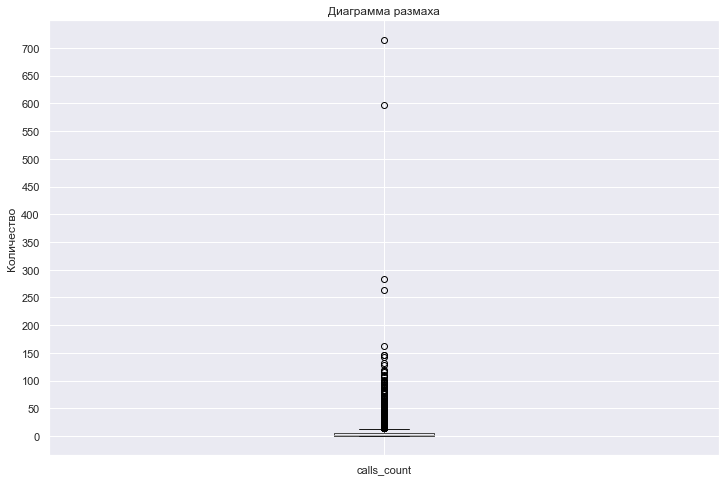

In [119]:
#диаграмма размаха
plt.figure(figsize=(12, 8))
axes = df_a_test.boxplot(column='calls_count')
axes.set_yticks(range(0, 750, 50))
plt.title('Диаграмма размаха')
plt.ylabel('Количество')
plt.show()

In [120]:
#отсекаем выбросы
df_a_test = df_a_test.query('calls_count < 150')

In [121]:
#разделение данные на будни и выходные
business_days = df_a_test[df_a_test['day_type'] == 'business_day']
weekends = df_a_test[df_a_test['day_type'] == 'weekend']

In [122]:
#доли пропущенных звонков
business_days_missed_call_rates = business_days['is_missed_call'].sum() / business_days['calls_count'].sum()
weekends_missed_call_rates = weekends['is_missed_call'].sum() / weekends['calls_count'].sum()

In [123]:
#размеры выборок
n1 = len(business_days)
n2 = len(weekends)

In [124]:
#доли пропущенных звонков в объединенной выборке
p = (business_days['is_missed_call'].sum() + weekends['is_missed_call'].sum()) / (business_days['calls_count'].sum() + weekends['calls_count'].sum())

#вычисление стандартной ошибки разности долей
se = np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))

#вычисление z-статистики
z = (business_days_missed_call_rates - weekends_missed_call_rates) / se

#вычиление p-уровень значимости
p_value = 2 * (1 - norm.cdf(abs(z)))

print(p_value)

0.17907491030306733


In [125]:
#задание уровня значимости
alpha = 0.05

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: выборки различаются')
else:
    print('Принимаем нулевую гипотезу: выборки не различаются')

Принимаем нулевую гипотезу: выборки не различаются


#### Вывод

Вероятность получить различия в долях пропущенных звонков в будни и выходные случайно равна 0.17, что меньше уровня значимости. Поэтому мы не можем отвергнуть нулевую гипотезу и сделать вывод, что различия в долях пропущенных звонков в будни и выходные статистически значимы на уровне значимости alpha=0.05. То есть, есть основания полагать, что доля пропущенных звонков не различается в зависимости от того рабочий день или выходной.

### Гипотеза 2

Формирование нулевой и альтернативной гипотез:

Первая нулевая гипотеза H0 - Для КЦ, работающих с исходящими вызовами, длительность одного разговора в будние дни и выходные одинакова.

Первая альтернативная гипотеза H1 - Для КЦ, работающих с исходящими вызовами, длительность одного разговора в будние дни и выходные различается.

In [126]:
#формирование таблицы
df_b_test = df.query('type == "O" & direction == "out" & is_missed_call == False')
#добавление столбца с порядковым днём недели
df_b_test = df_b_test.copy()
df_b_test['weekday_num'] = df_b_test['date'].apply(lambda x: x.weekday())
#добавление метки о рабочем или буднем дне
df_b_test['day_type'] = df_b_test['weekday_num'].apply(lambda x: 'business_day' if x <= 4 else 'weekend')
#проверка
df_b_test.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type,weekday_num,day_type
3,166377,2019-08-26,out,False,880022,False,3,1079.0,1093.0,O,0,business_day
4,166377,2019-08-26,out,False,880028,False,5,426.0,487.0,O,0,business_day
16,166377,2019-08-30,out,False,880022,False,1,239.0,257.0,O,4,business_day
17,166377,2019-08-30,out,False,880028,False,14,989.0,1099.0,O,4,business_day
31,166377,2019-09-04,out,False,880022,False,3,360.0,395.0,O,2,business_day


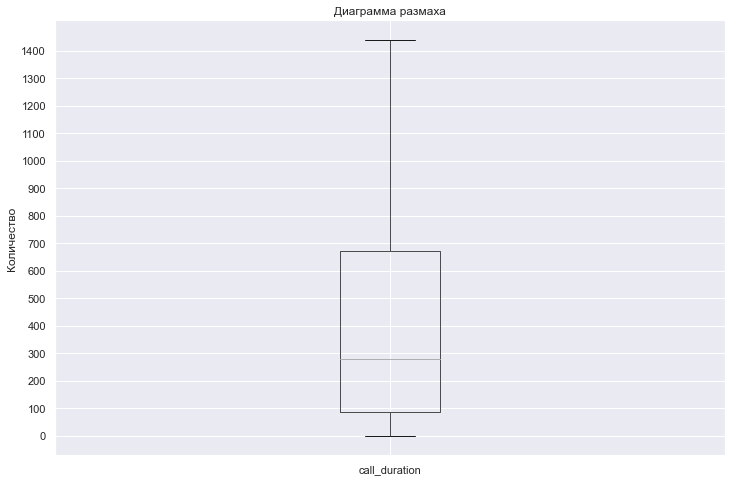

In [127]:
#диаграмма размаха
plt.figure(figsize=(12, 8))
axes = df_b_test.boxplot(column='call_duration')
axes.set_yticks(range(0, 1500, 100))
plt.title('Диаграмма размаха')
plt.ylabel('Количество')
plt.show()

In [128]:
# Разделяем данные на будни и выходные
business_days_2 = df_b_test[df_b_test['day_type'] == 'business_day']
weekends_2 = df_b_test[df_b_test['day_type'] == 'weekend']

In [129]:
df_b_test.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,type,weekday_num,day_type
3,166377,2019-08-26,out,False,880022,False,3,1079.0,1093.0,O,0,business_day
4,166377,2019-08-26,out,False,880028,False,5,426.0,487.0,O,0,business_day
16,166377,2019-08-30,out,False,880022,False,1,239.0,257.0,O,4,business_day
17,166377,2019-08-30,out,False,880028,False,14,989.0,1099.0,O,4,business_day
31,166377,2019-09-04,out,False,880022,False,3,360.0,395.0,O,2,business_day


In [130]:
# Считаем длительность одного звонка
business_days_missed_call_rates = list(business_days_2['call_duration'] / business_days_2['calls_count'])
weekends_missed_call_rates = list(weekends_2['call_duration'] / weekends_2['calls_count'])

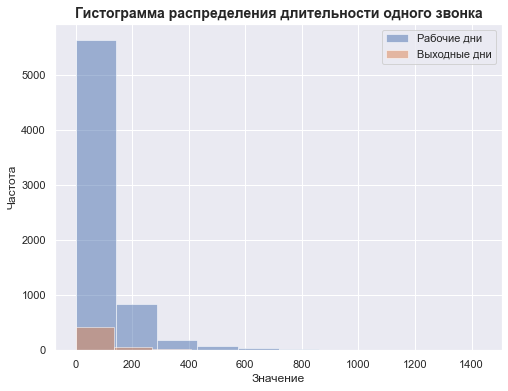

In [131]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(business_days_missed_call_rates, bins=10, alpha=0.5, label='Рабочие дни')
plt.hist(weekends_missed_call_rates, bins=10, alpha=0.5, label='Выходные дни')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма распределения длительности одного звонка', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [132]:
#тест Манна-Уитни
stat, p = mannwhitneyu(business_days_missed_call_rates, weekends_missed_call_rates)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принимаем нулевую гипотезу: выборки не различаются')
else:
    print('Отвергаем нулевую гипотезу: выборки различаются')

Statistics=1482641.000, p=0.000
Отвергаем нулевую гипотезу: выборки различаются


#### Вывод

С использованием теста Манна-Уитни было выявлено, что длительность разговоров в будние и выходные дни статистически значимо различается (p=0,000). Таким образом, можно утверждать, что длительность разговоров в будние и выходные дни отличается".

### Выводы после проверки статистических гипотез

Используя статистические методы, были проверены две гипотезы относительно работы операторов колл-центра. Было выявлено, что длительность разговоров в будние и выходные дни для операторов, работающих с исходящими вызовами, имеют статистически значимые различия, однако доли пропущенных звонков в будние и выходные дни для операторов, работающих со входящими вызовами, не имеют статистически значимых отличий. Таким образом, можно утверждать, что работа колл-центра зависима от дня недели, следовательно не имеет смысл разграничивать критерии оценки эффективности работы операторов в рабочие и выходные дни.

## Общий вывод

Задачей проекта являлось исследование колл центров с целью определения критериев и порогов эффективности операторов.

После стадии предобработки и удаления аномальных значений, в датасете присутствовали данные о 304 колл-центрах и 1075 операторе. Наблюдается большое преобладание исходящих вызовов над входящими. Соотношение 73,4% к 26,6% соответственно. 

Количество колл центров с одним оператором - 20, 288 - менее, чем с 10 операторами. Также представленны крупные колл-центры с идентификаторами - 168187б и 167626 с 51 и 49 операторами соответственно. Операторы без идентификатора - встречаются в 304 из 307 колл центров. В подавляющем большинстве, к такого рода операторам относятся неотвеченные вызовы. Вероятно, при поступлении входящего вызова, оператор не успевает назначаться. 

Данные представлены в промежутке с 2019-08-25 по 2019-11-28. Отмечу увеличение число записей от минимальной даты к максимальной с постоянной, высокой динамикой.

При анализе, была выявлена проблема с записью данных о продолжительности звонков КЦ с идентификатором - 166582. В ходе исследования было определено, что данные представленные в признаках продолжительности разговора являются минутами, но в случае этого конкретного колл центра - секундами, либо же данные записываются некорректно. 


Для расчета метрик эффективности КЦ были разделены по специализации:

- обрабтка входящих вызовов;
- совершение исходящих вызовов.

Также были установлены следующие критерии эффективности:

Будут рассмотрены следующие критерии оценки эффективности операторов:

Для входящих:

- процент пропущенных звонков ниже 66%
- время ожидания - менее 7 минут  
    
Для исходящих:

- Количество совершаемых звонков, минимальное количество исходящих звонков за смену - 6


16% операторов по работе с входящими звонками не эффективны по обоим признакам. Явная проблема с КЦ 168004 - 7 неэффективных операторов с высоким процентом пропущенных звонков и высоким временем ожидания клиента.

37% операторов по работе с исходящими вызовами - неэффективны. Есть целый ряд КЦ с большим количеством неэффективных операторов, соответственно потенциальных клиентов сервиса.


Эти колл центры, а также колл центры с высоким процентом пропущенных звонков - (166391, 167077, 167721, 167908, 167939, 168004, 168090, 168329, 168446) - также потенциальные клиенты разрабатываемого сервиса.   
